In [12]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import time

In [22]:
s = time.time()
df = pd.read_csv('./data_in_csv/yyfyyf-08-26.csv', names=['ID','Fans_Icon_Name','Level','Content'])
df.head()
print(time.time() - s)
df.head()

0.2763063907623291


,ID,Fans_Icon_Name,Level,Content
0,gaishaminghao,29,按摩师,心连心？
1,Akkyon,72,寅子,推推呢？？？
2,2233haha,11,无粉丝牌,决斗2打1
3,你屎临到头啦,8,小僵尸,这么吊
4,邢啵啵,16,口苗,配个doom 爆炸


In [28]:
df.stack().value_counts()

无粉丝牌                134615
小僵尸                 105980
1                    22476
16                   12823
15                   12406
13                   12252
18                   12251
5                    11546
14                   11446
20                   11440
4                    11435
17                   10967
12                   10954
8                    10736
11                   10541
6                    10410
19                   10318
7                     9957
3                     9902
10                    9842
21                    9777
9                     9724
lgd 咚咚咚!              9199
2                     8328
22                    7399
23                    6309
25                    4315
24                    4074
26                    4009
大马猴                   3170
                     ...  
休息去吧，别再播了，看的烦了           1
都是两边最强阵容了要               1
决赛BO几？吊大的说下              1
别像dac了呀                  1
这个盾为什么要打啊                1
瞧不起fygod                 1
A

In [15]:
s = time.time()
df = open('./data_in_csv/yyfyyf-08-26.csv', encoding='utf-8')
df = pd.read_csv(df, names=['ID','Fans_Icon_Name','Level','Content'])
df.head()

print(time.time() - s)

0.3860750198364258


In [18]:
s = time.time()
df.to_hdf('test.h5', key='yyf', table=True)
print(time.time() - s)

0.08177995681762695


In [10]:
s = time.time()
pd.read_hdf('test.h5')
print(time.time() - s)

0.16164851188659668


In [17]:
s = time.time()
df.to_csv('test.csv')
print(time.time() - s)

0.3935422897338867


In [4]:
%history

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df = open('./data_in_csv/龙弟弟-08-19.csv', encoding='utf-8')
df = pd.read_csv(df, names=['ID','Fans_Icon_Name','Level','Content'])
df.head()
df = open('./data_in_csv/yyfyyf-08-19.csv', encoding='utf-8')
df = pd.read_csv(df, names=['ID','Fans_Icon_Name','Level','Content'])
df.head()
%history


In [38]:
df['ID'].describe()

count       70209
unique      11281
top       Pofei龙！
freq          347
Name: ID, dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70209 entries, 0 to 70208
Data columns (total 4 columns):
ID                70209 non-null object
Fans_Icon_Name    70209 non-null object
Level             70209 non-null int64
Content           70209 non-null object
dtypes: int64(1), object(3)
memory usage: 2.1+ MB


In [4]:
duidui = df[df['Fans_Icon_Name'] == '怼怼']
duidui['ID'].value_counts().shape
df['Fans_Icon_Name'].value_counts().keys()

Index(['无粉丝牌', '怼怼', '楚河', '董导', '7911', '军师', '小乖', '爹神', '傻凉', '空伐',
       ...
       '傻三', '辉灰', '粉彬', 'Timi', '祺迹', '官官', '佬爹', '玥梦', '有钱', '梦醒'],
      dtype='object', length=488)

In [5]:
a = {'a':123,'b':'321'}
del a['a']
a

{'b': '321'}

In [6]:
import time
s = time.time()

import json

paizi = df['Fans_Icon_Name'].value_counts().keys()
icon_counts = {}
for p in paizi:
    p = p.strip()
    t = df[df['Fans_Icon_Name'] == p]
    icon_counts[p] = t['ID'].value_counts().shape[0]
    
icon_counts['其他（小于10）'] = 0
waitfordel = []
for key, val in icon_counts.items():
    if val < 10:
        icon_counts['其他（小于10）'] += val
        waitfordel.append(key)
for key in waitfordel:
    del icon_counts[key]
print(time.time()-s)
icon_counts

2.5007264614105225


{'无粉丝牌': 7339,
 '怼怼': 3069,
 '楚河': 104,
 '董导': 71,
 '7911': 59,
 '军师': 56,
 '小乖': 46,
 '爹神': 19,
 '18cm': 10,
 '魂潍': 14,
 'Aniu': 11,
 '帅狗': 15,
 '孤存': 11,
 'Kaer': 18,
 'Lf龙': 11,
 '狂人': 12,
 '其他（小于10）': 691}

In [7]:
icon_counts_more = {'其他（小于10）': 0}
for p in paizi:
    p = p.strip()
    num = df[df['Fans_Icon_Name'] == p].shape[0]
    if not p in icon_counts:
        icon_counts_more['其他（小于10）'] += num
    else:
        icon_counts_more[p] = num
icon_counts_more

{'其他（小于10）': 2438,
 '无粉丝牌': 38416,
 '怼怼': 27161,
 '楚河': 573,
 '董导': 368,
 '7911': 331,
 '军师': 302,
 '小乖': 121,
 '爹神': 105,
 '18cm': 63,
 '魂潍': 53,
 'Aniu': 52,
 '帅狗': 38,
 '孤存': 36,
 'Kaer': 30,
 'Lf龙': 27,
 '狂人': 19}

In [8]:
icon_counts = pd.Series(icon_counts)
icon_counts_more = pd.Series(icon_counts_more)

for key, val in icon_counts.items():
    print('%s:' % key, '%5.3f' % (icon_counts_more[key] / icon_counts[key]))

无粉丝牌: 5.235
怼怼: 8.850
楚河: 5.510
董导: 5.183
7911: 5.610
军师: 5.393
小乖: 2.630
爹神: 5.526
18cm: 6.300
魂潍: 3.786
Aniu: 4.727
帅狗: 2.533
孤存: 3.273
Kaer: 1.667
Lf龙: 2.455
狂人: 1.583
其他（小于10）: 3.528


mean: 8.850
median: 3.000
std: 17.119


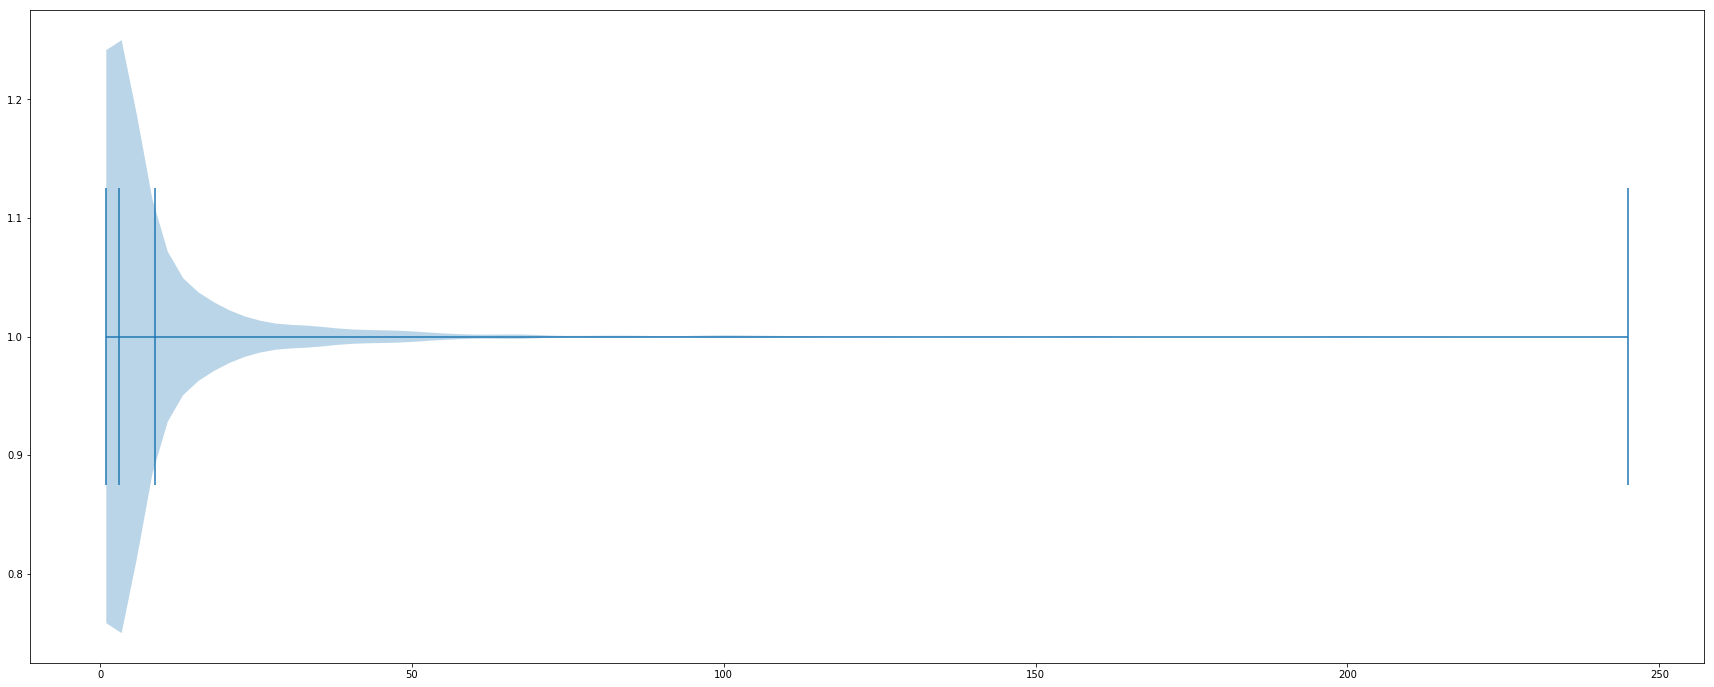

In [9]:
example = duidui['ID'].value_counts()
fig, ax = plt.subplots(1,1, figsize=(30,12))
axe = ax.violinplot(example, vert=False, showextrema=True, showmeans=True, showmedians=True,)
print('mean: %5.3f' % example.mean())
print('median: %5.3f' % example.median())
print('std: %5.3f' % example.std())

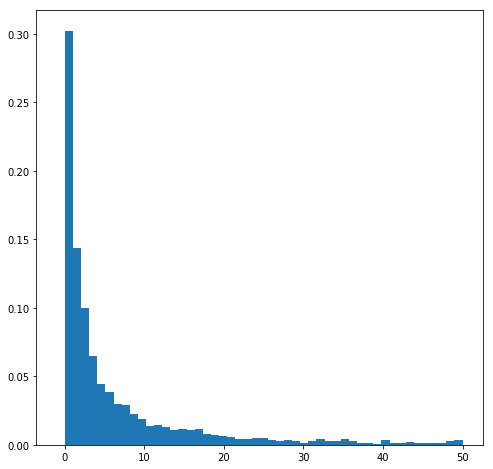

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.hist(example, bins=50, range=(-1,50), density=True, histtype='barstacked')
plt.show()

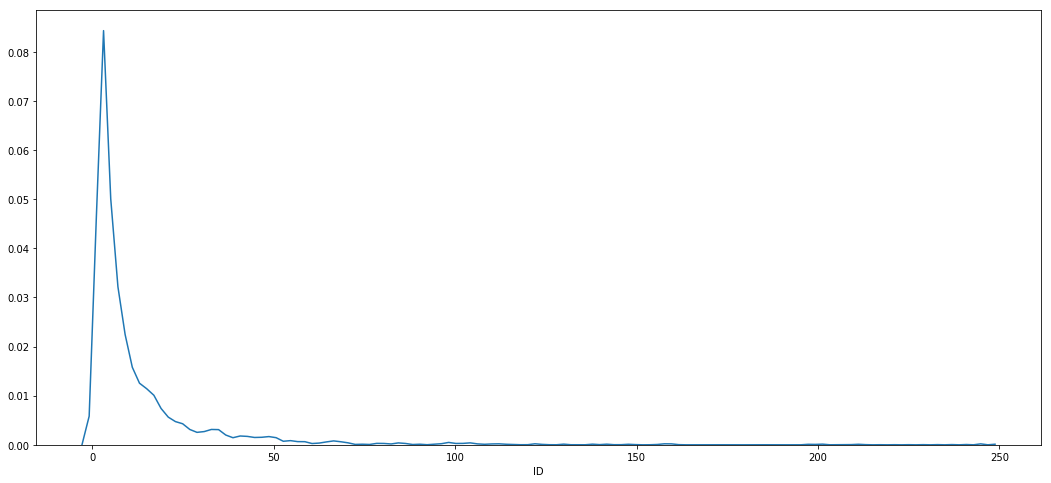

In [132]:
import seaborn as sns

fig, ax = plt.subplots(1,1,figsize=(18,8))
p = sns.distplot(example, hist=False, bins=200, ax=ax)

In [142]:
d = df.copy()
for key in icon_counts.keys():
    d = d[d['Fans_Icon_Name'] != key]
d['Fans_Icon_Name'].value_counts()

傻凉      91
空伐      90
康娜      71
波神      54
0414    47
巨丁      45
爵孓      37
why     36
一号      35
啊飞      32
轩子      32
ふ宇      31
毣毣      31
亞儿      28
卡帝      27
寒夜      27
习习      27
夏z      27
哈尼      26
黑店\n    26
阿驴      25
谁神      25
夜郎      25
星痕\n    24
BQ怪     24
丛林      24
德军      22
狗恺      22
雏菊      19
琪7      19
        ..
羞娘       1
舟舟       1
暖茄       1
七攻       1
祺迹       1
逗雅       1
蛋魔       1
银魔       1
守微       1
子焱       1
Suix     1
Smg      1
鳯九       1
Ai七      1
天zi      1
老七       1
色兔       1
七彩       1
画芯       1
明訷       1
辉灰       1
尛沫       1
嘉猪       1
萌绿       1
小姨       1
童灿       1
X皮       1
金毛       1
神猫       1
星yu      1
Name: Fans_Icon_Name, Length: 472, dtype: int64

In [66]:
a = np.linspace(-1.25, 1.25, 1250)
a[:,] == a
b[:, None]

array([[-3.],
       [-2.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 2.],
       [ 3.]])

In [4]:
import numpy as np

b = np.linspace(-3,3,7)
b + b[:,None] * 1j
b + b[:,None]

array([[-6., -5., -4., -3., -2., -1.,  0.],
       [-5., -4., -3., -2., -1.,  0.,  1.],
       [-4., -3., -2., -1.,  0.,  1.,  2.],
       [-3., -2., -1.,  0.,  1.,  2.,  3.],
       [-2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.]])

In [71]:
b[:,None]+[1,2,3,4]

array([[-2., -1.,  0.,  1.],
       [-1.,  0.,  1.,  2.],
       [ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.]])

In [40]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sys

def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    print(Z.shape)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N

xmin, xmax, xn = -2.25, +0.75, 3000/2
ymin, ymax, yn = -1.25, +1.25, 2500/2
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log(np.log(horizon))/np.log(2)
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)
Z.shape

C:\Users\zw493\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys
C:\Users\zw493\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


(1250, 1500)


(1250, 1500)

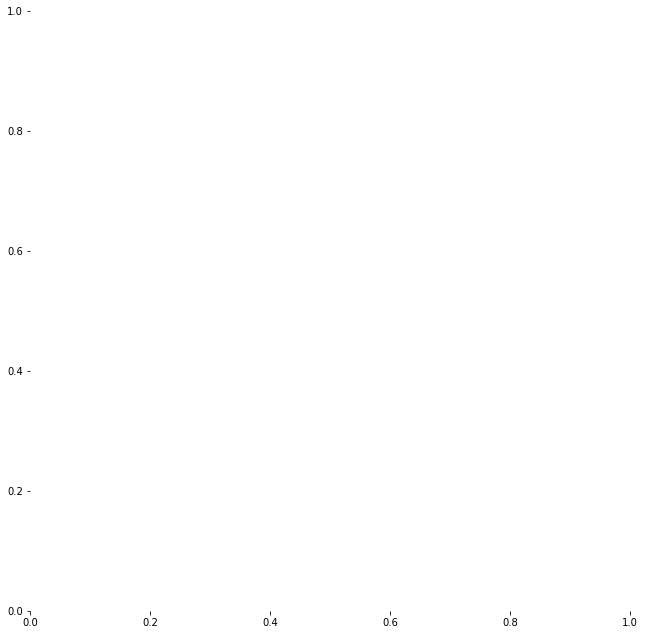

In [41]:
with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 -
                        np.log(np.log(abs(Z)))/np.log(2) +
                        log_horizon)

dpi = 72
width = 10
height = 10*yn/xn
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')

C:\Users\zw493\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """
C:\Users\zw493\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


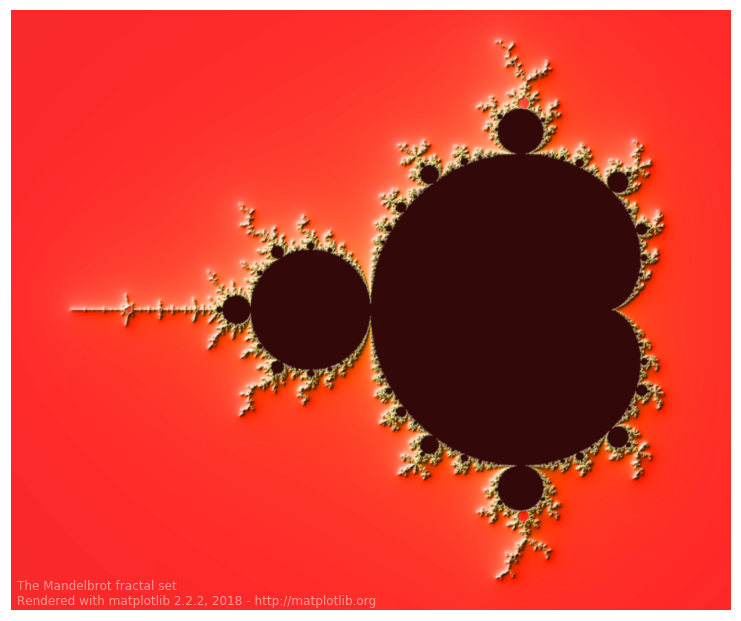

In [39]:
import numpy as np


def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn).astype(np.float32)
    Y = np.linspace(ymin, ymax, yn).astype(np.float32)
    C = X + Y[:, None] * 1j
    N = np.zeros_like(C, dtype=int)
    Z = np.zeros_like(C)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N


if __name__ == '__main__':
    import time
    import matplotlib
    from matplotlib import colors
    import matplotlib.pyplot as plt

    xmin, xmax, xn = -2.25, +0.75, 3000/2
    ymin, ymax, yn = -1.25, +1.25, 2500/2
    maxiter = 200
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

    # Normalized recount as explained in:
    # https://linas.org/art-gallery/escape/smooth.html
    # https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

    # This line will generate warnings for null values but it is faster to
    # process them afterwards using the nan_to_num
    with np.errstate(invalid='ignore'):
        M = np.nan_to_num(N + 1 -
                          np.log(np.log(abs(Z)))/np.log(2) +
                          log_horizon)

    dpi = 72
    width = 10
    height = 10*yn/xn
    fig = plt.figure(figsize=(width, height), dpi=dpi)
    ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

    # Shaded rendering
    light = colors.LightSource(azdeg=315, altdeg=10)
    M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                    norm=colors.PowerNorm(0.3), blend_mode='hsv')
    plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
    ax.set_xticks([])
    ax.set_yticks([])

    # Some advertisement for matplotlib
    year = time.strftime("%Y")
    text = ("The Mandelbrot fractal set\n"
            "Rendered with matplotlib %s, %s - http://matplotlib.org"
            % (matplotlib.__version__, year))
    ax.text(xmin+.025, ymin+.025, text, color="white", fontsize=12, alpha=0.5)

    plt.show()

(array([2.606e+03, 7.460e+02, 7.090e+02, 7.350e+02, 7.450e+02, 8.370e+02,
        8.550e+02, 8.740e+02, 1.953e+03, 1.262e+03, 1.305e+03, 1.278e+03,
        1.535e+03, 1.641e+03, 1.446e+03, 1.330e+03, 2.678e+03, 1.136e+03,
        1.281e+03, 8.570e+02, 5.650e+02, 5.470e+02, 3.980e+02, 2.310e+02,
        2.400e+02, 2.580e+02, 9.400e+01, 1.320e+02, 6.600e+01, 4.500e+01,
        1.310e+02, 8.000e+00, 1.900e+01, 3.500e+01, 3.000e+00, 1.100e+01,
        7.000e+00, 1.300e+01, 5.000e+00, 3.000e+00, 8.000e+00, 4.000e+00,
        2.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  2.12,  3.24,  4.36,  5.48,  6.6 ,  7.72,  8.84,  9.96,
        11.08, 12.2 , 13.32, 14.44, 15.56, 16.68, 17.8 , 18.92, 20.04,
        21.16, 22.28, 23.4 , 24.52, 25.64, 26.76, 27.88, 29.  , 30.12,
        31.24, 32.36, 33.48, 34.6 , 35.72, 36.84, 37.96, 39.08, 40.2 ,
        41.32, 42.44, 43.56, 44.68, 45.8 , 46.92, 48.04, 49.16, 50.28,
        51.4 , 52.52,

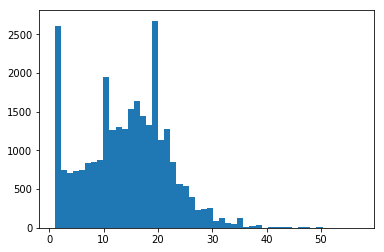

In [55]:
df = pd.read_csv('./data_in_csv/yyf-0811.csv', names=['ID', 'Level', 'Fans_Icon', 'Content'])
plt.hist(df['Level'], bins=50)

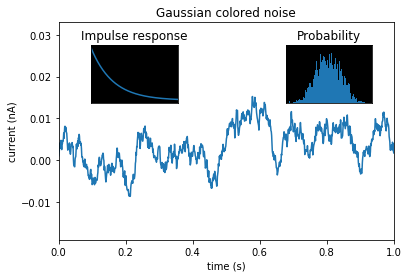

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1 * np.min(s), 2 * np.max(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='k')
n, bins, patches = plt.hist(s, 400, density=True)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='k')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])

plt.show()

In [39]:
pd.Series.value_counts?

Signature: pd.Series.value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)
Docstring:
Returns object containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : boolean, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : boolean, default True
    Sort by values
ascending : boolean, default False
    Sort in ascending order
bins : integer, optional
    Rather than count values, group them into half-open bins,
    a convenience for pd.cut, only works with numeric data
dropna : boolean, default True
    Don't include counts of NaN.

Returns
-------
counts : Series
File:      c:\users\zw493\anaconda3\lib\site-packages\pandas\core\base.py
Type:      function


In [46]:
df['Fans_Icon'].value_counts()

11457

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re
from multiprocessing import Pool
import pandas as pd
import numpy as np
import csv

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [5]:
browser = webdriver.Chrome()
browser.get('https://www.huya.com/longdd')

In [69]:
with open('test.csv', 'w+', newline='') as f:
    writer.writerows(d)   

In [115]:
s = time.time()
node = browser.find_elements_by_xpath('//div[@class="msg-normal"]')[4]
wait = WebDriverWait(browser, 3600)
chunks = re.findall('<div class="msg-normal">(.*?)</div>', browser.page_source, re.S)

for chunk in chunks:
    name = re.findall('个人信息">(.*?)</span', chunk, re.S)[0]   
    fans = re.findall('fans-icon-.*?">(.*?)</span>', chunk, re.S)
    if fans:
        fans = fans[0]
        level = re.findall('fans-icon-(.*?)">', chunk, re.S)[0]
    else:
        fans = '无粉丝牌'
        level = '-1'
        
    content = re.findall('"msg".*?>(.*?)</span>', chunk, re.S)[0]
    #print(name, fans, level, content)
    with open('test.csv', 'a+', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow([name, fans, level, content])
print(time.time()-s)

0.06404590606689453


In [116]:
s = time.time()
node = browser.find_elements_by_xpath('//div[@class="msg-normal"]')[4]
wait = WebDriverWait(browser, 3600)
chunks = re.findall('<div class="msg-normal">(.*?)</div>', browser.page_source, re.S)

names = []
fans = []
levels = []
contents = []

for chunk in chunks:
    fan = re.findall('fans-icon-.*?">(.*?)<' , chunk, re.S)
    if re.findall('fans-icon-.*?">(.*?)<' , chunk, re.S):
        fans.append(fan[0])
        levels.append(re.findall('fans-icon-(.*?)">', chunk, re.S)[0])
    else:
        fans.append('无粉丝牌')
        levels.append('-1')
    names.append(re.findall('个人信息">(.*?)</span', chunk, re.S)[0])
    contents.append(re.findall('"msg".*?>(.*?)</span>', chunk, re.S)[0])
    
with open('test.csv', 'a+', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows(zip(names,fans,levels,contents))
    
print(time.time()-s)
node

0.043882131576538086


<selenium.webdriver.remote.webelement.WebElement (session="45529200794eb7313925244e4b8e6c7d", element="0.5146394365784026-313")>

In [6]:
from requests import get
from pyquery import PyQuery as pq

In [17]:
'123'.encode('utf-8')

b'123'

In [1]:
import sys

In [3]:
sys.flags

sys.flags(debug=0, inspect=0, interactive=0, optimize=0, dont_write_bytecode=0, no_user_site=0, no_site=0, ignore_environment=0, verbose=0, bytes_warning=0, quiet=0, hash_randomization=1, isolated=0)

In [4]:
sys.path

['',
 'C:\\Users\\zw493\\Anaconda3\\python36.zip',
 'C:\\Users\\zw493\\Anaconda3\\DLLs',
 'C:\\Users\\zw493\\Anaconda3\\lib',
 'C:\\Users\\zw493\\Anaconda3',
 'C:\\Users\\zw493\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\zw493\\Anaconda3\\lib\\site-packages\\algorithms-0.1.0-py3.6.egg',
 'C:\\Users\\zw493\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\zw493\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\zw493\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\zw493\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\zw493\\.ipython']

In [5]:
sys.meta_path

[_frozen_importlib.BuiltinImporter,
 _frozen_importlib.FrozenImporter,
 _frozen_importlib_external.PathFinder,

In [7]:
<six._SixMetaPathImporter at 0x1e363e07dd8>

SyntaxError: invalid syntax (<ipython-input-7-7aa2c9c44afa>, line 1)

In [11]:
sys.platform

'win32'

In [12]:
sys.prefix

'C:\\Users\\zw493\\Anaconda3'

In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(iris.data, iris.target)
estimator = model.estimators_[5]
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=454748338, splitter='best')

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', feature_names=iris.feature_names, class_names=iris.target_names, rounded=True, proportion=False, precision=2, filled=True)

In [13]:
from subprocess import call
call(['dot', 'Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

1

In [14]:
from IPython.display import Image
Image(filename='tree.png')

In [2]:
import pandas as pd
import numpy as np
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [3]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [6]:
ser.loc[0]

0.0

In [7]:
zip?

Init signature: zip(self, /, *args, **kwargs)
Docstring:     
zip(iter1 [,iter2 [...]]) --> zip object

Return a zip object whose .__next__() method returns a tuple where
the i-th element comes from the i-th iterable argument.  The .__next__()
method continues until the shortest iterable in the argument sequence
is exhausted and then it raises StopIteration.
Type:           type


In [8]:
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),
                    columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [9]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [11]:
frame.add(series3, axis=0)

,b,d,e
Utah,1.0,2.0,3.0
Ohio,7.0,8.0,9.0
Texas,13.0,14.0,15.0
Oregon,19.0,20.0,21.0


In [12]:
frame = pd.DataFrame(np.random.rand(4,3), columns=list('bde'), index=list('1234'))
frame

,b,d,e
1,0.929616,0.316376,0.183919
2,0.204560,0.567725,0.595545
3,0.964515,0.653177,0.748907
4,0.653570,0.747715,0.961307


In [69]:
f = lambda x: x.min() - x.max()
frame.apply(f)

b   -0.759954
d   -0.431339
e   -0.777388
dtype: float64

In [18]:
frame.apply(f, axis=)

1    0.745697
2    0.390984
3    0.311337
4    0.307737
dtype: float64

In [16]:
int('0x557', base=16)

1367

In [34]:
chr(0x10f)

False

In [70]:
data = pd.DataFrame({'Qu1':[1,3,4,3,4],
                    'Qu2':[2,3,1,2,3],
                    'Qu3':[1,5,2,4,4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [73]:
data.apply(pd.value_counts)

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [75]:
data.apply(pd.value_counts, axis=1)

,1,2,3,4,5
0,2.0,1.0,NaN,NaN,NaN
1,NaN,NaN,2.0,NaN,1.0
2,1.0,1.0,NaN,1.0,NaN
3,NaN,1.0,1.0,1.0,NaN
4,NaN,NaN,1.0,2.0,NaN


In [77]:
data_ = pd.DataFrame({'Qu1':[1,3,4,3,4],})
data_.apply(pd.value_counts)

,Qu1
4,2
3,2
1,1


In [80]:
data.iloc[:,0].value_counts()

4    2
3    2
1    1
Name: Qu1, dtype: int64

In [1]:
import requests
import pandas as pd

In [8]:
proxies = {
  'http': 'http://localhost:1080',
  'https': 'http://localhost:1080',
}

header = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36'
}
url = requests.get('https://zh.wikipedia.org/wiki/%E6%A2%85%E8%A5%BF%E8%80%B6%E5%A4%A9%E4%BD%93%E5%88%97%E8%A1%A8', proxies=proxies)

In [7]:
pd.read_html(url.text)[0]

,0,1,2,3,4,5,6,7,8
0,梅西耶編號,NGC/IC編號,通稱,圖片,種類,距離（千光年）,所屬星座,視星等,來源
1,M1,NGC 1952,蟹狀星雲,NaN,超新星殘骸,4.9-8.1,金牛座,8.4,[10]
2,M2,NGC 7089,NaN,NaN,球狀星團,33,水瓶座,6.3,[11]
3,M3,NGC 5272,NaN,NaN,球狀星團,33.9,獵犬座,6.2,[12]
4,M4,NGC 6121,NaN,NaN,球狀星團,7.2,天蠍座,5.9,[13]
5,M5,NGC 5904,NaN,NaN,球狀星團,24.5,巨蛇座,6.7,[14]
6,M6,NGC 6405,蝴蝶星團,NaN,疏散星團,1.6,天蠍座,4.2,[15]
7,M7,NGC 6475,托勒密星團,NaN,疏散星團,0.65-1.31,天蠍座,3.3,[16]
8,M8,NGC 6523,礁湖星雲,NaN,發射星雲與疏散星團,4.1,人馬座,6.0,[17]
9,M9,NGC 6333,NaN,NaN,球狀星團,25.8,蛇夫座,8.4,[18]


In [9]:
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
def distance(size=10000):
    dists = []
    for i in np.arange(size):
        a = [np.random.random(), np.random.random()]
        b = [np.random.random(), np.random.random()]
        dist = np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)
        dists.append(dist)
    return dists

mean: 0.5214336961279102
std: 0.001388981587351748


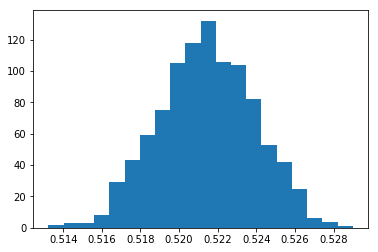

In [33]:
mean = []
std = []
for i in range(1000):
    dist = distance(size=10000)

    #plt.hist(dist, bins=100)
    #plt.show()
    mean.append(np.mean(dist))
    std.append(np.std(dist))
print('mean:', np.mean(mean))
print('std:', np.std(std))
plt.hist(mean, bins=20)
plt.show()

In [ ]:
d = []
for i in range(100000):
    d.append(np.random.random() -np.random.random())
plt.hist(d, bins=100)

In [23]:
import pandas as pd 
import requests

resp = requests.get('http://www.dotamax.com/hero/rate/')
html = resp.text
resp.status_code

200

In [25]:
df = pd.read_html(html)
df[0]

,英雄,胜率,使用次数
0,敌法师,50.23%,3397298.0
1,斧王,54.11%,4368002.0
2,祸乱之源,45.24%,630934.0
3,嗜血狂魔,52.09%,3750186.0
4,水晶室女,54.40%,4398746.0
5,卓尔游侠,51.98%,3072160.0
6,撼地者,50.65%,3853370.0
7,主宰,49.67%,4414211.0
8,米拉娜,50.76%,3955374.0
9,变体精灵,45.30%,1196303.0


In [48]:
from bs4  import BeautifulSoup
from lxml import etree 
html_ = BeautifulSoup(html, 'lxml')
h = etree.HTML(html)
re = h.xpath('//a/@href')
re

['//cdn.max-c.com/app/Maxjia_release.apk',
 '/',
 '/home/',
 '/hero/rate/',
 '/hero/rate/',
 '/item/',
 '/match/tour_famous_team_list/',
 '/player/',
 '/ladder/',
 '/live/',
 '/app',
 '/login/',
 'https://itunes.apple.com/cn/app/id990892583',
 '//cdn.max-c.com/app/Maxjia_release.apk',
 '/hero/',
 '/hero/rate',
 '/hero/played',
 '/hero/gpm',
 '/hero/kda',
 '/hero/cs',
 '/hero/dmg',
 '/set_language/?language=en',
 '/set_language/?language=ru',
 '/set_language/?language=ko',
 'mailto:zhisong.huang@dotamax.com',
 '/status/',
 'http://shang.qq.com/wpa/qunwpa?idkey=ef26fe7efd134659b38b044ae44ae8342c20f1654d9c372fd094f96bd004819e',
 '/faq/',
 'http://xiaoheihe.cn',
 '/summary/',
 'http://weibo.com/5606942020/profile?topnav=1&wvr=6',
 'http://t.qq.com/dotamax?preview ',
 '/share_history/',
 '/joinus/',
 'http://www.beian.gov.cn/portal/registerSystemInfo?recordcode=13010202002199',
 '/openid/login/?sid=web_bind',
 '/bets/faq/']

In [1]:
from selenium.common.exceptions import StaleElementReferenceException as SERE

In [4]:
if True:
    raise SERE

StaleElementReferenceException: Message: None


In [31]:
class Stale(SERE):
    def __init__(self):
        super(Stale, self).__init__(msg='child')

In [32]:
exc = Stale()
raise exc

Stale: Message: child


In [34]:
a = SERE(msg='base')
raise a

In [36]:
from sympy import *
x = symbols('x')

In [37]:
a = Inte

x

In [ ]:
from sympy import *
x, y, z = symbols('x y z')
init_printing(use_unicode=True)

In [ ]:
diff(cos(x), x)

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

In [2]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [6]:
data[(np.abs(data) > 3)] = np.sign(data)*3

In [9]:
data[(np.abs(data) > 2.9).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.000000,-1.021228
97,-0.774363,0.552936,0.106061,3.000000
102,-0.655054,-0.565230,3.000000,0.959533
130,-1.251504,-2.949343,0.634634,0.124157
305,-2.315555,0.457246,-0.025907,-3.000000
324,0.050188,1.951312,3.000000,0.963301
326,-0.749181,-2.989741,-1.295289,-1.690195
382,0.202225,-0.505124,2.954439,-2.630247
400,0.146326,0.508391,-0.196713,-3.000000
445,1.093890,-1.254319,-2.925113,0.654578


In [ ]:
mnames = ['movie_id', 'title', 'genres']

movies = pd.